In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
movies = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/Movie.csv")
movies.head()

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5


In [3]:
movies['userId'].nunique()

4081

In [4]:
movies['movie'].nunique()

10

In [5]:
movies['movie'].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)',
       'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)',
       'Sudden Death (1995)', 'GoldenEye (1995)'], dtype=object)

In [6]:
movies.shape

(8992, 3)

In [7]:
pop_movies = movies['movie'].value_counts()
pop_movies

movie
Toy Story (1995)                      2569
GoldenEye (1995)                      1548
Heat (1995)                           1260
Jumanji (1995)                        1155
Sabrina (1995)                         700
Grumpier Old Men (1995)                685
Father of the Bride Part II (1995)     657
Sudden Death (1995)                    202
Waiting to Exhale (1995)               138
Tom and Huck (1995)                     78
Name: count, dtype: int64

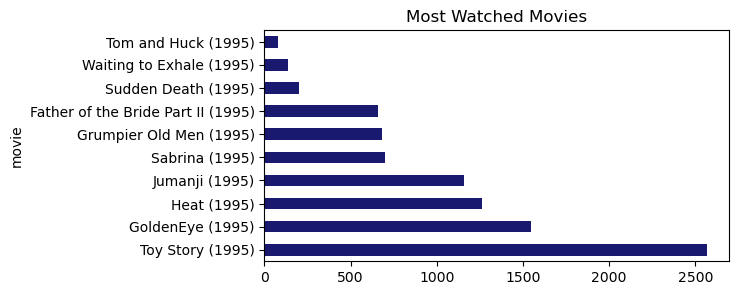

In [8]:
pop_movies.plot(kind='barh', figsize=(6,3), title='Most Watched Movies', color='midnightblue')
plt.show()

In [9]:
common_ratings = movies['rating'].value_counts()
common_ratings

rating
3.0    2736
4.0    2660
5.0    1394
3.5     679
2.0     542
4.5     374
2.5     277
1.0     212
1.5      61
0.5      57
Name: count, dtype: int64

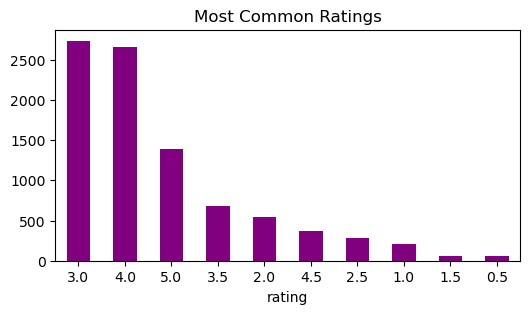

In [10]:
common_ratings.plot(kind='bar', figsize=(6,3), title='Most Common Ratings', color='purple')
plt.xticks(rotation=0)
plt.show()

In [11]:
movies.groupby('movie').agg('mean')

,userId,rating
movie,,
Father of the Bride Part II (1995),3418.366819,3.143836
GoldenEye (1995),3500.766150,3.427003
Grumpier Old Men (1995),3580.858394,3.186861
Heat (1995),3541.284127,3.836508
Jumanji (1995),3520.225974,3.268398
Sabrina (1995),3577.260000,3.381429
Sudden Death (1995),3351.485149,3.017327
Tom and Huck (1995),3292.884615,3.352564
Toy Story (1995),3528.748151,3.959323


In [12]:
avg_ratings = movies.groupby('movie').agg('mean')['rating']
avg_ratings = avg_ratings.sort_values(ascending=False)
avg_ratings

movie
Toy Story (1995)                      3.959323
Heat (1995)                           3.836508
GoldenEye (1995)                      3.427003
Sabrina (1995)                        3.381429
Tom and Huck (1995)                   3.352564
Jumanji (1995)                        3.268398
Grumpier Old Men (1995)               3.186861
Father of the Bride Part II (1995)    3.143836
Sudden Death (1995)                   3.017327
Waiting to Exhale (1995)              3.000000
Name: rating, dtype: float64

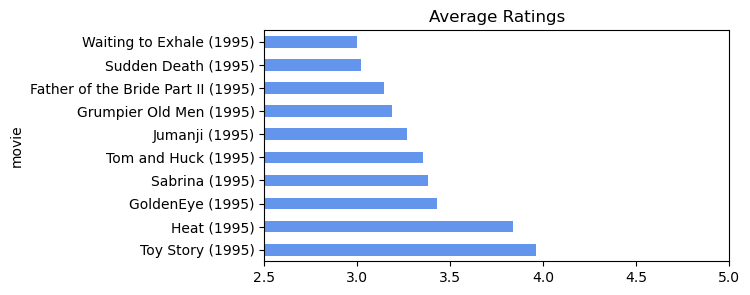

In [13]:
avg_ratings.plot(kind='barh', figsize=(6,3), title='Average Ratings', color='cornflowerblue')
plt.xlim(2.5,5)
plt.show()

In [14]:
user_movie_df = movies.pivot(columns='movie', index='userId', values='rating' )
user_movie_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [15]:
user_movie_df.fillna(0, inplace=True)

In [16]:
user_movie_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
usr_sim_mat = cosine_similarity(user_movie_df)
usr_sim_mat

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [19]:
np.fill_diagonal(usr_sim_mat,0)

In [20]:
usr_sim_mat

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 0.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 0.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 0.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        0.        ]])

In [21]:
user_sim_df = pd.DataFrame(usr_sim_mat, index=movies['userId'].unique(),columns=movies['userId'].unique())
user_sim_df

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
3,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
7070,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
7080,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
7087,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [22]:
user = 19

In [23]:
user_sim_df.loc[user]

3       0.000000
6       0.000000
8       0.874157
10      0.388514
11      0.000000
          ...   
7044    0.000000
7070    0.657870
7080    0.568212
7087    0.874157
7105    0.544201
Name: 19, Length: 4081, dtype: float64

In [24]:
user_sim_df.loc[user].sort_values(ascending=False)

3603    1.000000
1359    0.999927
3998    0.999927
5611    0.999445
3540    0.999445
          ...   
6328    0.000000
6326    0.000000
6310    0.000000
6293    0.000000
5557    0.000000
Name: 19, Length: 4081, dtype: float64

In [25]:
user_sim_df.loc[user].sort_values(ascending=False)[:3]

3603    1.000000
1359    0.999927
3998    0.999927
Name: 19, dtype: float64

In [26]:
sim_users = user_sim_df.loc[user].sort_values(ascending=False)[:3].index.values
sim_users

array([3603, 1359, 3998], dtype=int64)

In [27]:
sim_usr_ratings = user_movie_df.loc[sim_users]
sim_usr_ratings

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
3603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1359,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,3.0,0.0
3998,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0


In [28]:
sim_usr_ratings.values.argsort()

array([[0, 1, 2, 3, 4, 5, 6, 7, 9, 8],
       [0, 1, 2, 5, 6, 7, 9, 4, 8, 3],
       [0, 2, 4, 5, 6, 7, 9, 3, 1, 8]], dtype=int64)

In [29]:
sim_item_idx = sim_usr_ratings.values.argsort()[:,-1]
sim_item_idx

array([8, 3, 8], dtype=int64)

In [30]:
sim_usr_ratings.columns

Index(['Father of the Bride Part II (1995)', 'GoldenEye (1995)',
       'Grumpier Old Men (1995)', 'Heat (1995)', 'Jumanji (1995)',
       'Sabrina (1995)', 'Sudden Death (1995)', 'Tom and Huck (1995)',
       'Toy Story (1995)', 'Waiting to Exhale (1995)'],
      dtype='object', name='movie')

In [31]:
recommend_movies = sim_usr_ratings.columns[sim_item_idx].values
recommend_movies.tolist()

['Toy Story (1995)', 'Heat (1995)', 'Toy Story (1995)']

In [32]:
print(f'Recommend {recommend_movies} to user {user}')

Recommend ['Toy Story (1995)' 'Heat (1995)' 'Toy Story (1995)'] to user 19


In [33]:
user_movie_df.T

userId,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
movie,,,,,,,,,,,,,,,,,,,,,
Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,3.5,0.0,0.0,0.0
GoldenEye (1995),0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.5,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0
Grumpier Old Men (1995),0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
Heat (1995),0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0
Jumanji (1995),3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0
Sabrina (1995),0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0
Sudden Death (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Tom and Huck (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Toy Story (1995),0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,4.0,4.5,...,0.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,5.0,4.5


In [34]:
item_sim_mat = cosine_similarity(user_movie_df.T)
item_sim_mat

array([[1.        , 0.21599275, 0.45566216, 0.24736744, 0.27980393,
        0.39574604, 0.22645759, 0.16293622, 0.30863759, 0.16378738],
       [0.21599275, 1.        , 0.21819777, 0.39773907, 0.40226034,
        0.22145469, 0.1552551 , 0.11972423, 0.38348625, 0.12844824],
       [0.45566216, 0.21819777, 1.        , 0.2901502 , 0.24471005,
        0.39017783, 0.25538652, 0.14395914, 0.31691062, 0.1564475 ],
       [0.24736744, 0.39773907, 0.2901502 , 1.        , 0.2800876 ,
        0.26207226, 0.25562862, 0.06285821, 0.40011642, 0.12402064],
       [0.27980393, 0.40226034, 0.24471005, 0.2800876 , 1.        ,
        0.24667163, 0.14328579, 0.19637377, 0.40998238, 0.14767896],
       [0.39574604, 0.22145469, 0.39017783, 0.26207226, 0.24667163,
        1.        , 0.20155614, 0.16464129, 0.31043392, 0.1894145 ],
       [0.22645759, 0.1552551 , 0.25538652, 0.25562862, 0.14328579,
        0.20155614, 1.        , 0.09721338, 0.16679265, 0.15179972],
       [0.16293622, 0.11972423, 0.1439591

In [35]:
np.fill_diagonal(item_sim_mat,0)

In [36]:
item_sim_df = pd.DataFrame(item_sim_mat, index=movies['movie'].unique(),columns=movies['movie'].unique())
item_sim_df

,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995)
Toy Story (1995),0.000000,0.215993,0.455662,0.247367,0.279804,0.395746,0.226458,0.162936,0.308638,0.163787
Jumanji (1995),0.215993,0.000000,0.218198,0.397739,0.402260,0.221455,0.155255,0.119724,0.383486,0.128448
Grumpier Old Men (1995),0.455662,0.218198,0.000000,0.290150,0.244710,0.390178,0.255387,0.143959,0.316911,0.156447
Waiting to Exhale (1995),0.247367,0.397739,0.290150,0.000000,0.280088,0.262072,0.255629,0.062858,0.400116,0.124021
Father of the Bride Part II (1995),0.279804,0.402260,0.244710,0.280088,0.000000,0.246672,0.143286,0.196374,0.409982,0.147679
Heat (1995),0.395746,0.221455,0.390178,0.262072,0.246672,0.000000,0.201556,0.164641,0.310434,0.189415
Sabrina (1995),0.226458,0.155255,0.255387,0.255629,0.143286,0.201556,0.000000,0.097213,0.166793,0.151800
Tom and Huck (1995),0.162936,0.119724,0.143959,0.062858,0.196374,0.164641,0.097213,0.000000,0.095521,0.148723
Sudden Death (1995),0.308638,0.383486,0.316911,0.400116,0.409982,0.310434,0.166793,0.095521,0.000000,0.138524
GoldenEye (1995),0.163787,0.128448,0.156447,0.124021,0.147679,0.189415,0.151800,0.148723,0.138524,0.000000


In [37]:
# Find top 3 movies highly rated by user 11
# Find movies similar to the above movies